In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import sys

In [60]:
sys.path.append('..')

In [61]:
from functions.select_cols_functions import *

In [62]:
df = pd.read_csv('../../data/train_2_classes.csv')

In [63]:
df = apply_all_rules(df)

In [64]:
# Dividir o DataFrame em X (características) e y (alvo)
X = df.drop('AdoptionSpeed', axis=1)  # Remove a coluna alvo para obter o conjunto de características
y = df['AdoptionSpeed']  # Obtém apenas a coluna alv

In [65]:
# Criar um range de valores de k de 1 a 20
valores_k = range(1, 21)

pontuacoes_medias = []

# Listas para armazenar as métricas de desempenho para cada valor de k
precisoes = []
recalls = []
f1_scores = []
auc_roc_scores = []

# Loop sobre os valores de k
for k in valores_k:
    # Inicializar o modelo k-NN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Calcular a pontuação de validação cruzada para o modelo com k vizinhos
    pontuacoes = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # Use scoring='accuracy' para acurácia
    
    # Calcular as previsões para todas as divisões usando validação cruzada
    previsoes_cv = cross_val_predict(knn, X, y, cv=5)
    
    # Calcular precisão, recall, F1-score e AUC-ROC
    precisao = precision_score(y, previsoes_cv)
    recall = recall_score(y, previsoes_cv)
    f1 = f1_score(y, previsoes_cv)
    auc_roc = roc_auc_score(y, previsoes_cv)
    
    # Adicionar métricas à lista de métricas
    precisoes.append(precisao)
    recalls.append(recall)
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)

    # Calcular a pontuação de validação cruzada para o modelo com k vizinhos
    pontuacoes = cross_val_score(knn, X, y, cv=5)  # cv=5 indica 5 folds na validação cruzada
    
    # Calcular a pontuação média de validação cruzada para este valor de k
    pontuacao_media = np.mean(pontuacoes)
    
    # Adicionar a pontuação média à lista de pontuações médias
    pontuacoes_medias.append(pontuacao_media)

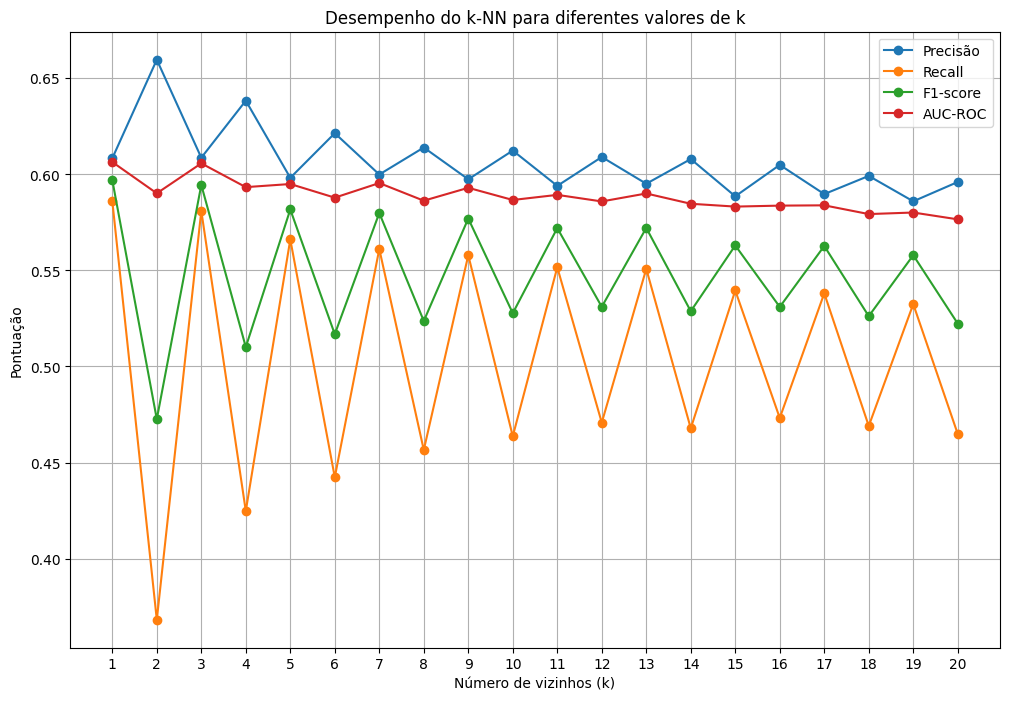

In [66]:
# Plotar as métricas de desempenho em função de k
plt.figure(figsize=(12, 8))

plt.plot(valores_k, precisoes, label='Precisão', marker='o', linestyle='-')
plt.plot(valores_k, recalls, label='Recall', marker='o', linestyle='-')
plt.plot(valores_k, f1_scores, label='F1-score', marker='o', linestyle='-')
plt.plot(valores_k, auc_roc_scores, label='AUC-ROC', marker='o', linestyle='-')

plt.title('Desempenho do k-NN para diferentes valores de k')
plt.xlabel('Número de vizinhos (k)')
plt.ylabel('Pontuação')
plt.xticks(valores_k)
plt.legend()
plt.grid(True)
plt.show()

In [67]:
melhor_k = valores_k[np.argmax(pontuacoes_medias)]

# Inicializar o modelo k-NN para o melhor k
knn = KNeighborsClassifier(n_neighbors=melhor_k)

# Calcular as pontuações de validação cruzada detalhadas para o melhor k
pontuacoes_detalhadas = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
precision_detalhadas = cross_val_score(knn, X, y, cv=5, scoring='precision')
recall_detalhadas = cross_val_score(knn, X, y, cv=5, scoring='recall')
f1_detalhadas = cross_val_score(knn, X, y, cv=5, scoring='f1')
roc_auc_detalhadas = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')

print('melhor k: ', melhor_k)

melhor k:  1


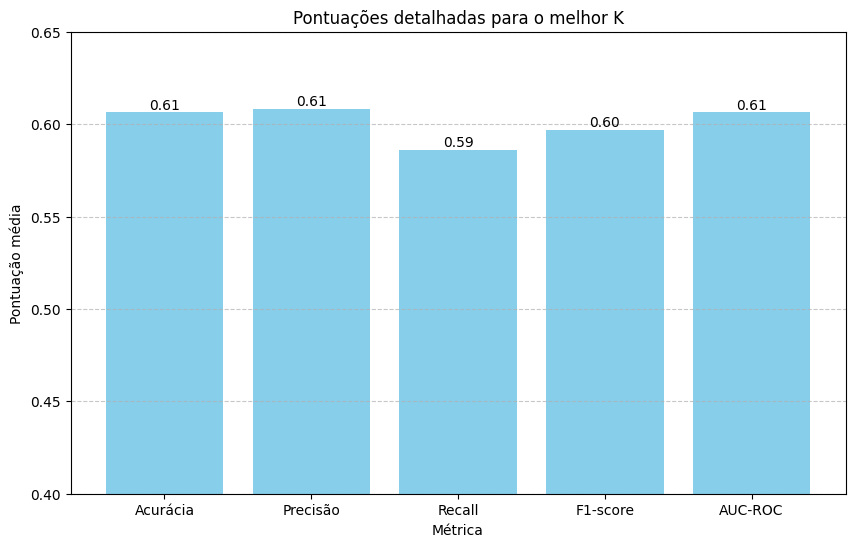

In [68]:
# Listas de métricas e pontuações detalhadas
metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-score', 'AUC-ROC']
pontuacoes = [pontuacoes_detalhadas, precision_detalhadas, recall_detalhadas, f1_detalhadas, roc_auc_detalhadas]

# Calculando as médias das pontuações para cada métrica
medias = [np.mean(pontuacao) for pontuacao in pontuacoes]

# Plotando o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
plt.bar(metricas, medias, color='skyblue')

# Adicionando os valores das médias nas barras
for i, media in enumerate(medias):
    plt.text(i, media, f'{media:.2f}', ha='center', va='bottom')

# Configurações do gráfico
plt.title('Pontuações detalhadas para o melhor K')
plt.xlabel('Métrica')
plt.ylabel('Pontuação média')
plt.ylim(0.4, 0.65)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()


<Figure size 1000x600 with 0 Axes>

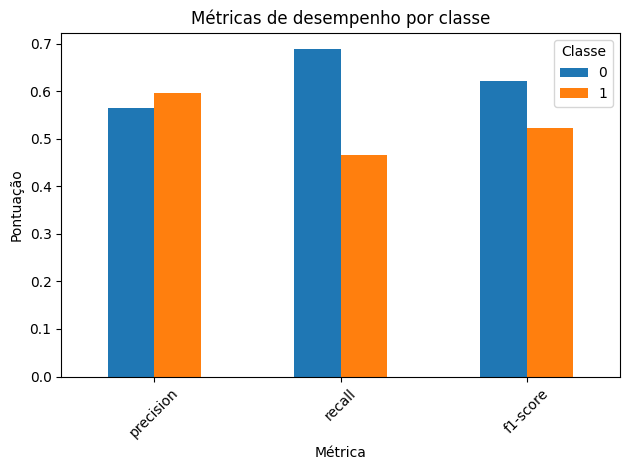

In [69]:
from sklearn.metrics import classification_report, accuracy_score

# Calcular o relatório de classificação para o melhor k
relatorio_classificacao = classification_report(y, previsoes_cv, output_dict=True)

# Converter o relatório de classificação em um DataFrame para facilitar a manipulação
relatorio_df = pd.DataFrame(relatorio_classificacao)

# Adicionar a acurácia ao DataFrame
relatorio_df.loc['accuracy'] = accuracy_score(y, previsoes_cv)

# Plotar as métricas de desempenho para cada classe
plt.figure(figsize=(10, 6))
relatorio_df.loc['precision':'f1-score', '0':'1'].plot(kind='bar', rot=0)
plt.title('Métricas de desempenho por classe')
plt.xlabel('Métrica')
plt.ylabel('Pontuação')
plt.xticks(rotation=45)
plt.legend(title='Classe')
plt.tight_layout()
plt.show()